### KAWOOMA ELIJAH
### B29158 M24B38/023


In [14]:
#first importing pandas library to create a dataframe using our data set 
import pandas as pd

In [4]:
# we import the data set into our environment using pandas 
data1 = pd.read_excel("D:/Elijah/Year_2/Data_and_Big_Data_in_R/data_sets/Student_performance.xlsx")

In [16]:
#seeing the data
data1.describe(include="all")#the additional syntax in brackets includes all the data in the data set that the usual describe method would leave out

,Access_no,gender,age,course,DSC3108,DSC3114,MTH3108,SYE3104
count,11.000000,11,11.000000,10,10.000000,10.000000,11.000000,11.000000
unique,NaN,2,NaN,3,NaN,NaN,NaN,NaN
top,NaN,female,NaN,Computer_Science,NaN,NaN,NaN,NaN
freq,NaN,6,NaN,4,NaN,NaN,NaN,NaN
mean,496.545455,NaN,21.454545,NaN,63.200000,76.300000,70.090909,62.818182
std,278.903339,NaN,0.522233,NaN,24.220285,16.418486,18.030278,25.956957
min,123.000000,NaN,21.000000,NaN,25.000000,40.000000,38.000000,19.000000
25%,317.500000,NaN,21.000000,NaN,47.250000,70.000000,64.500000,42.000000
50%,415.000000,NaN,21.000000,NaN,67.500000,76.500000,78.000000,65.000000
75%,723.500000,NaN,22.000000,NaN,85.000000,86.000000,79.000000,86.500000


In [8]:
#seeing all the observations and variables in the data set 
data1.shape
#this data set has (11, 8) 11 observations and 8 variables 

(11, 8)

In [7]:
#determing the data types of the variables in the data 
data1.dtypes

Access_no      int64
gender        object
age            int64
course        object
DSC3108      float64
DSC3114      float64
MTH3108        int64
SYE3104        int64
dtype: object

In [9]:
#determing which variables have missing data using the isnull and sum function 
data1.isnull().sum()

Access_no    0
gender       0
age          0
course       1
DSC3108      1
DSC3114      1
MTH3108      0
SYE3104      0
dtype: int64

- course,DSC3108 and DSC3114 each have one missing value

In [19]:
#removing the missing data 
data1 = data1.dropna()

In [20]:
#checking for duplicated data 
data1.duplicated().sum() #there are no duplicated values in this data set 

np.int64(0)

In [21]:
#getting only the continuous data and removing the categorical data 
cont_data = data1.select_dtypes(exclude="object")
cont_data

,Access_no,age,DSC3108,DSC3114,MTH3108,SYE3104
0,123,21,89.0,88.0,72,65
1,415,22,91.0,98.0,88,89
2,321,21,73.0,70.0,38,41
3,124,21,30.0,40.0,60,31
4,314,22,70.0,75.0,78,60
5,891,21,25.0,70.0,69,19
6,729,22,65.0,80.0,38,43
7,892,21,90.0,95.0,92,93


- using IQR(interquartile range ) to determine which columns have outliers 

In [22]:
# Detect outliers using the IQR method for each continuous variable
outliers = {}
for col in cont_data.columns:
    Q1 = cont_data[col].quantile(0.25)
    Q3 = cont_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_indices = cont_data[(cont_data[col] < lower_bound) | (cont_data[col] > upper_bound)].index
    outliers[col] = outlier_indices.tolist()

outliers  # This will show the indices of outliers for each column

{'Access_no': [],
 'age': [],
 'DSC3108': [],
 'DSC3114': [3],
 'MTH3108': [],
 'SYE3104': []}

- visualise the data to see if there any outliers in the data set

Matplotlib is building the font cache; this may take a moment.


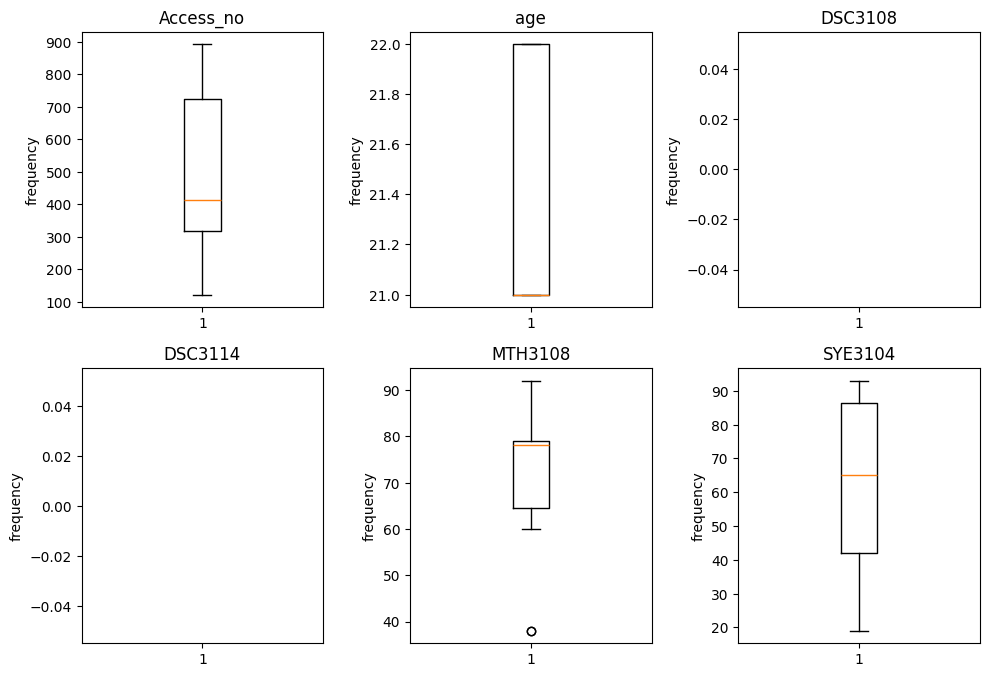

In [18]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10,10))
for i, col in enumerate(cont_data.columns):
    plt.subplot(3, 3, i+1)
    plt.boxplot(cont_data[col])
    plt.title(col)
    plt.ylabel(f"frequency")
plt.tight_layout()
plt.show()

In [24]:
# Function to remove outliers using the IQR method on the continous data frame 
def remove_outliers_iqr(df):
    df_clean = df.copy()
    for col in df_clean.columns:
        Q1 = df_clean[col].quantile(0.25)  # 25th percentile
        Q3 = df_clean[col].quantile(0.75)  # 75th percentile
        IQR = Q3 - Q1                      # Interquartile range
        lower_bound = Q1 - 1.5 * IQR       # Lower bound for outliers
        upper_bound = Q3 + 1.5 * IQR       # Upper bound for outliers
        # Keep only rows within the bounds for this column
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean


no_out_data = remove_outliers_iqr(cont_data)
no_out_data.head()

,Access_no,age,DSC3108,DSC3114,MTH3108,SYE3104
0,123,21,89.0,88.0,72,65
1,415,22,91.0,98.0,88,89
2,321,21,73.0,70.0,38,41
4,314,22,70.0,75.0,78,60
5,891,21,25.0,70.0,69,19


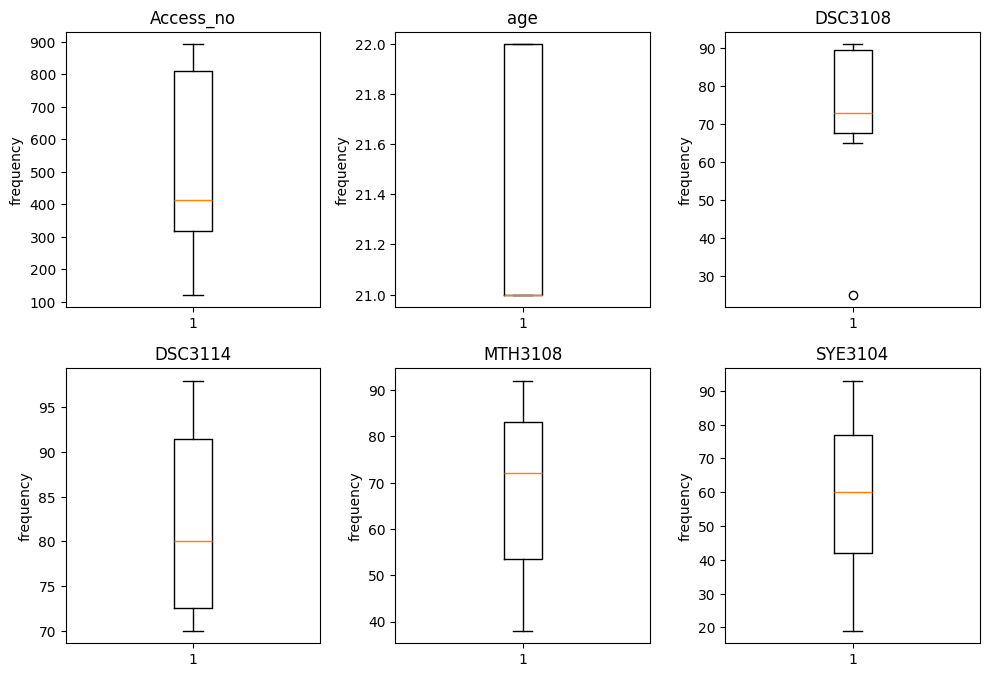

In [25]:
plt.figure(figsize=(10,10))
for i, col in enumerate(no_out_data.columns):
    plt.subplot(3, 3, i+1)
    plt.boxplot(no_out_data[col])
    plt.title(col)
    plt.ylabel(f"frequency")
plt.tight_layout()
plt.show()

- The data nolonger has anyoutliers and missing information , so its ready to be used in testing and model training 